### **1. YOLOv3 image inference : practice**

In [ ]:
!mkdir ./data_01
!wget -O ./data_01/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

In [2]:
import cv2

image = cv2.imread('./data_01/beatles01.jpg')
draw_image = image.copy()

In [3]:
!mkdir ./pretrained_01
!wget -O ./pretrained_01/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O ./pretrained_01/yolov3.config https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true 

--2022-08-12 20:54:37--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘./pretrained_01/yolov3.weights’

./pretrained_01/yol 100%[===================>] 236.52M  57.6MB/s    in 4.3s    

2022-08-12 20:54:41 (55.3 MB/s) - ‘./pretrained_01/yolov3.weights’ saved [248007048/248007048]

--2022-08-12 20:54:41--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2022-08-12 20:54:42--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.

In [4]:
!ls ./pretrained_01

yolov3.config  yolov3.weights


In [5]:
weights_path = './pretrained_01/yolov3.weights'
config_path =  './pretrained_01/yolov3.config'

cv_net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [6]:
layer_names = cv_net.getLayerNames()
print(f'layer_names : {layer_names}')

layer_names : ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'b

In [7]:
out_layers = cv_net.getUnconnectedOutLayers()
print(f'out_layers : {out_layers}')

out_layers : [200 227 254]


In [8]:
out_layers_names = [layer_names[i-1] for i in out_layers]
print(f'out_layers_name : {out_layers_names}')

out_layers_name : ['yolo_82', 'yolo_94', 'yolo_106']


In [9]:
cv_net.setInput(cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
cv_out = cv_net.forward(out_layers_names)
print(f'cv_out shape : {cv_out[0].shape} / {cv_out[1].shape} / {cv_out[2].shape}')
print(f'cv_out len : {len(cv_out)} > {len(cv_out[0])} > {len(cv_out[0][0])}')

cv_out shape : (507, 85) / (2028, 85) / (8112, 85)
cv_out len : 3 > 507 > 85


In [10]:
cv_out

(array([[0.03803749, 0.04702339, 0.38768154, ..., 0.        , 0.        ,
         0.        ],
        [0.04705836, 0.03385845, 0.26896036, ..., 0.        , 0.        ,
         0.        ],
        [0.04941482, 0.03791986, 0.7151826 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9585798 , 0.9460585 , 0.35046622, ..., 0.        , 0.        ,
         0.        ],
        [0.96015006, 0.9630715 , 0.29724196, ..., 0.        , 0.        ,
         0.        ],
        [0.9663636 , 0.9657401 , 0.7935606 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01637368, 0.02457962, 0.04684628, ..., 0.        , 0.        ,
         0.        ],
        [0.01678772, 0.01458679, 0.46203217, ..., 0.        , 0.        ,
         0.        ],
        [0.02219823, 0.01376948, 0.0662718 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97421783, 0.97686917, 0.04557502, ..., 0.        , 0.        ,
         0.        

In [11]:
cv_out[0]

array([[0.03803749, 0.04702339, 0.38768154, ..., 0.        , 0.        ,
        0.        ],
       [0.04705836, 0.03385845, 0.26896036, ..., 0.        , 0.        ,
        0.        ],
       [0.04941482, 0.03791986, 0.7151826 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9585798 , 0.9460585 , 0.35046622, ..., 0.        , 0.        ,
        0.        ],
       [0.96015006, 0.9630715 , 0.29724196, ..., 0.        , 0.        ,
        0.        ],
       [0.9663636 , 0.9657401 , 0.7935606 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [12]:
cv_out[0][0]

array([3.8037486e-02, 4.7023393e-02, 3.8768154e-01, 1.4516227e-01,
       4.4870718e-10, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [13]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                       11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                       21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                       31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                       41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                       51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                       61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                       71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush'}

In [14]:
import numpy as np

image_height = image.shape[0]
image_width = image.shape[1]

confidence_threshold = 0.5
nms_threshold = 0.4

class_ids = []
class_confidences = []
boxes = []

for idx_01, output in enumerate(cv_out):
  print(f'output shape : {output.shape}')
  for idx_02, detection in enumerate(output):
    class_prob = detection[5:]
    class_id = np.argmax(class_prob)
    class_confidence = class_prob[class_id]
    if class_confidence > confidence_threshold:
      print(f'index 01 : {idx_01} / index 02 : {idx_02} / class_id : {class_id}, / class_confidence : {class_confidence}')
      center_x = int(detection[0] * image_width)
      center_y = int(detection[1] * image_height)
      width = int(detection[2] * image_width)
      height = int(detection[3] * image_height)
      left = int(center_x - width/2)
      top = int(center_y - height/2)

      class_ids.append(class_id)
      class_confidences.append(class_confidence)
      boxes.append([left, top, width, height])

output shape : (507, 85)
index 01 : 0 / index 02 : 316 / class_id : 0, / class_confidence : 0.8499568700790405
index 01 : 0 / index 02 : 319 / class_id : 0, / class_confidence : 0.9317018389701843
index 01 : 0 / index 02 : 325 / class_id : 0, / class_confidence : 0.7300977110862732
index 01 : 0 / index 02 : 328 / class_id : 0, / class_confidence : 0.9623238444328308
index 01 : 0 / index 02 : 334 / class_id : 0, / class_confidence : 0.9984486103057861
index 01 : 0 / index 02 : 337 / class_id : 0, / class_confidence : 0.9833526611328125
index 01 : 0 / index 02 : 343 / class_id : 0, / class_confidence : 0.997843325138092
index 01 : 0 / index 02 : 346 / class_id : 0, / class_confidence : 0.6375315189361572
output shape : (2028, 85)
index 01 : 1 / index 02 : 831 / class_id : 2, / class_confidence : 0.8169965744018555
index 01 : 1 / index 02 : 832 / class_id : 2, / class_confidence : 0.7153812646865845
index 01 : 1 / index 02 : 877 / class_id : 2, / class_confidence : 0.7854183316230774
inde

In [15]:
results = cv2.dnn.NMSBoxes(boxes, class_confidences, confidence_threshold, nms_threshold)
print(f'results : {results}')

results : [ 4 17  6 15 30 28 24 32 11  8 34 33 25 29]


In [16]:
boxes[results[0]]

[383, 266, 195, 292]

In [17]:
import matplotlib.pyplot as plt

green_color=(0, 255, 0)
red_color=(0, 0, 255)

if len(results) > 0:
    for i in results:
      box = boxes[i]
      left = box[0]
      top = box[1]
      width = box[2]
      height = box[3]
      caption = (f'{labels_to_names_seq[class_ids[i]]} : {class_confidences[i]:.4f}')

      cv2.rectangle(draw_image, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
      cv2.putText(draw_image, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color=red_color, thickness=1)
      print(caption)

data_dir = ('./drive/MyDrive/Colab Notebooks/update/dl_cv/5_dl_cv_yolo_inference/data/beatles01_output.jpg')
cv2.imwrite(data_dir, draw_image)

person : 0.9984
person : 0.9984
person : 0.9978
person : 0.9878
car : 0.9504
car : 0.9412
car : 0.9077
car : 0.9064
car : 0.8473
car : 0.8170
person : 0.7641
car : 0.6900
car : 0.6332
car : 0.6154


True

In [ ]:
plt.figure(figsize=(12, 10))
image_output = plt.imread(data_dir)
plt.imshow(image_output)
plt.show()

### **2. YOLOv3 image inference : functionalize the code**

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [20]:
def get_detected_image(cv_net, image, confidence_threshold, nms_threshold, is_print=True):
  image_height = image.shape[0]
  image_width = image.shape[1]

  layer_names = cv_net.getLayerNames()
  out_layers = cv_net.getUnconnectedOutLayers()
  out_layers_names = [layer_names[i-1] for i in out_layers]

  cv_net.setInput(cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
  start = time.time()
  cv_out = cv_net.forward(out_layers_names)

  class_ids = []
  class_confidences = []
  boxes = []

  for idx_01, output in enumerate(cv_out):
    for idx_02, detection in enumerate(output):
      class_prob = detection[5:]
      class_id = np.argmax(class_prob)
      class_confidence = class_prob[class_id]
      if class_confidence > confidence_threshold:
        center_x = int(detection[0] * image_width)
        center_y = int(detection[1] * image_height)
        width = int(detection[2] * image_width)
        height = int(detection[3] * image_height)
        left = int(center_x - width/2)
        top = int(center_y - height/2)
        class_ids.append(class_id)
        class_confidences.append(class_confidence)
        boxes.append([left, top, width, height])

  results = cv2.dnn.NMSBoxes(boxes, class_confidences, confidence_threshold, nms_threshold)
  
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  if len(results) > 0:
      for i in results:
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        caption = (f'{labels_to_names_seq[class_ids[i]]} : {class_confidences[i]:.4f}')
        cv2.rectangle(draw_image, (int(left), int(top)), (int(left+width), int(top+height)), color=green_color, thickness=2)
        cv2.putText(draw_image, caption, (int(left), int(top-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color=red_color, thickness=1)
        print(caption)
  
  if is_print:
    print(f'detection time : {round(time.time()-start, 2)}초')
  
  return draw_image

In [21]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                       11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                       21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                       31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                       41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                       51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                       61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                       71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush'}

In [ ]:
!mkdir ./data_02
!wget -O ./data_02/beatles02.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

In [23]:
image = cv2.imread('./data_02/beatles02.jpg')
draw_image = image.copy()

In [24]:
!mkdir ./pretrained_02
!wget -O ./pretrained_02/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O ./pretrained_02/yolov3.config https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true 

weights_path = './pretrained_02/yolov3.weights'
config_path =  './pretrained_02/yolov3.config'

cv_net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

--2022-08-12 20:54:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘./pretrained_02/yolov3.weights’

./pretrained_02/yol 100%[===================>] 236.52M  59.8MB/s    in 4.2s    

2022-08-12 20:54:54 (56.6 MB/s) - ‘./pretrained_02/yolov3.weights’ saved [248007048/248007048]

--2022-08-12 20:54:54--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2022-08-12 20:54:54--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.

In [25]:
draw_img = get_detected_image(cv_net, image, confidence_threshold=0.5, nms_threshold=0.4, is_print=True)
data_dir = ('./drive/MyDrive/Colab Notebooks/update/dl_cv/5_dl_cv_yolo_inference/data/beatles02_output.jpg')
cv2.imwrite(data_dir, draw_image)

person : 0.9984
person : 0.9984
person : 0.9978
person : 0.9878
car : 0.9504
car : 0.9412
car : 0.9077
car : 0.9064
car : 0.8473
car : 0.8170
person : 0.7641
car : 0.6900
car : 0.6332
car : 0.6154
detection time : 1.62초


True

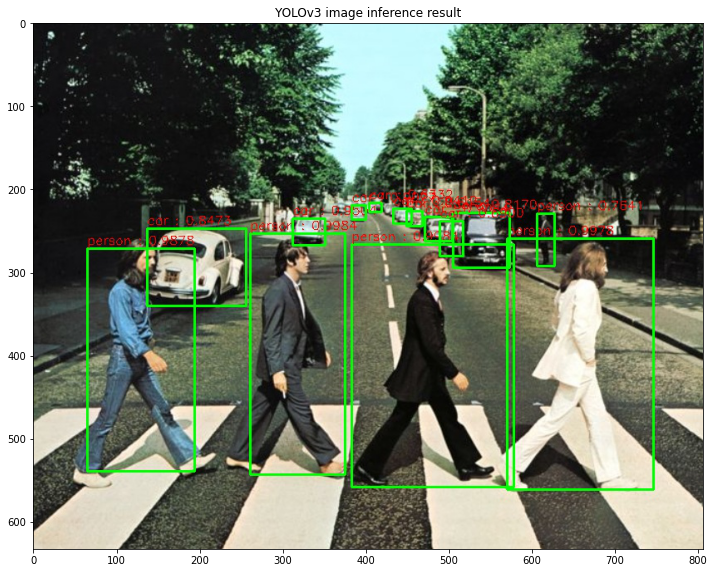

In [26]:
plt.figure(figsize=(12, 10))
image_output = plt.imread(data_dir)
plt.imshow(image_output)
plt.title('YOLOv3 image inference result')
plt.show()